In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, transforms
from PIL import Image
import os
import csv
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from models import *
from function import *

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

C:\Users\DSP523\AppData\Local\Temp\ipykernel_18180\3586345711.py:12: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


cpu


In [9]:
# Argument
batch_size = 32
epochs = 10

In [3]:
train_tfm = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [4]:
train_set = trainDataset('retina-train', 'train_labels.csv', train_tfm)
train_set_size = int(len(train_set) * 0.8)
train_set, valid_set = torch.utils.data.random_split(train_set, [train_set_size, len(train_set) - train_set_size])

test_set = testDataset('retina-test', train_tfm)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=False, num_workers=0)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)

In [5]:
def Plot(title, ylabel, epochs, train_loss, valid_loss):
    plt.figure()
    plt.title(title)
    plt.xlabel('epochs')
    plt.ylabel(ylabel)
    plt.plot(epochs, train_loss)
    plt.plot(epochs, valid_loss)
    plt.legend(['train', 'valid'], loc='upper left')
    plt.savefig('PIC' + title + ".png")

100%|██████████| 53/53 [00:10<00:00,  5.25it/s]


Epoch 1 / 10 | train_accs = 0.5743405275779376 & train_loss = 0.030803473197298942


100%|██████████| 14/14 [00:01<00:00, 11.50it/s]


Epoch 1 / 10 | validation_accs = 0.5789473684210527 & validation_loss = 0.032778986475684425


100%|██████████| 53/53 [00:09<00:00,  5.67it/s]


Epoch 2 / 10 | train_accs = 0.5833333333333334 & train_loss = 0.03077503102574703


100%|██████████| 14/14 [00:01<00:00, 12.11it/s]


Epoch 2 / 10 | validation_accs = 0.5789473684210527 & validation_loss = 0.03268981407703966


100%|██████████| 53/53 [00:09<00:00,  5.87it/s]


Epoch 3 / 10 | train_accs = 0.5833333333333334 & train_loss = 0.030524087323845147


100%|██████████| 14/14 [00:01<00:00, 11.99it/s]


Epoch 3 / 10 | validation_accs = 0.5789473684210527 & validation_loss = 0.032558442730652656


100%|██████████| 53/53 [00:08<00:00,  5.91it/s]


Epoch 4 / 10 | train_accs = 0.5833333333333334 & train_loss = 0.030639081836032638


100%|██████████| 14/14 [00:01<00:00, 12.10it/s]


Epoch 4 / 10 | validation_accs = 0.5789473684210527 & validation_loss = 0.03276573470905067


100%|██████████| 53/53 [00:09<00:00,  5.64it/s]


Epoch 5 / 10 | train_accs = 0.5833333333333334 & train_loss = 0.03081107436181258


100%|██████████| 14/14 [00:01<00:00, 11.25it/s]


Epoch 5 / 10 | validation_accs = 0.5789473684210527 & validation_loss = 0.03273558374226949


100%|██████████| 53/53 [00:08<00:00,  5.94it/s]


Epoch 6 / 10 | train_accs = 0.5833333333333334 & train_loss = 0.030740259148234087


100%|██████████| 14/14 [00:01<00:00, 12.14it/s]


Epoch 6 / 10 | validation_accs = 0.5789473684210527 & validation_loss = 0.0325853754744005


100%|██████████| 53/53 [00:08<00:00,  5.99it/s]


Epoch 7 / 10 | train_accs = 0.5833333333333334 & train_loss = 0.030832070598213506


100%|██████████| 14/14 [00:01<00:00, 11.78it/s]


Epoch 7 / 10 | validation_accs = 0.5789473684210527 & validation_loss = 0.03273465159977452


100%|██████████| 53/53 [00:08<00:00,  5.97it/s]


Epoch 8 / 10 | train_accs = 0.5833333333333334 & train_loss = 0.03078593188624302


100%|██████████| 14/14 [00:01<00:00, 12.20it/s]


Epoch 8 / 10 | validation_accs = 0.5789473684210527 & validation_loss = 0.03273206093664945


100%|██████████| 53/53 [00:08<00:00,  5.97it/s]


Epoch 9 / 10 | train_accs = 0.5833333333333334 & train_loss = 0.030781526752798962


100%|██████████| 14/14 [00:01<00:00, 12.26it/s]


Epoch 9 / 10 | validation_accs = 0.5789473684210527 & validation_loss = 0.03272776141691436


100%|██████████| 53/53 [00:08<00:00,  6.03it/s]


Epoch 10 / 10 | train_accs = 0.5833333333333334 & train_loss = 0.030774072956124082


100%|██████████| 14/14 [00:01<00:00, 12.28it/s]


Epoch 10 / 10 | validation_accs = 0.5789473684210527 & validation_loss = 0.032720172804508486


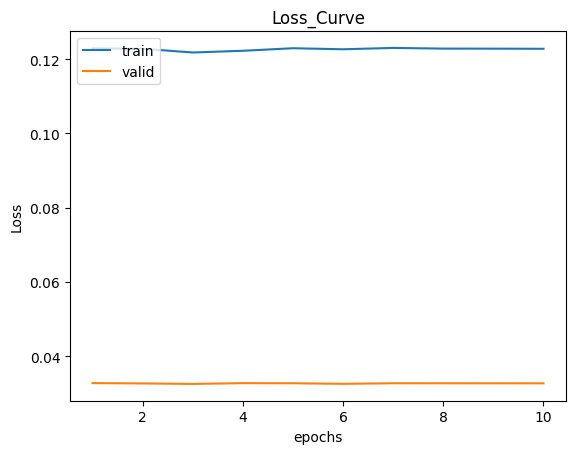

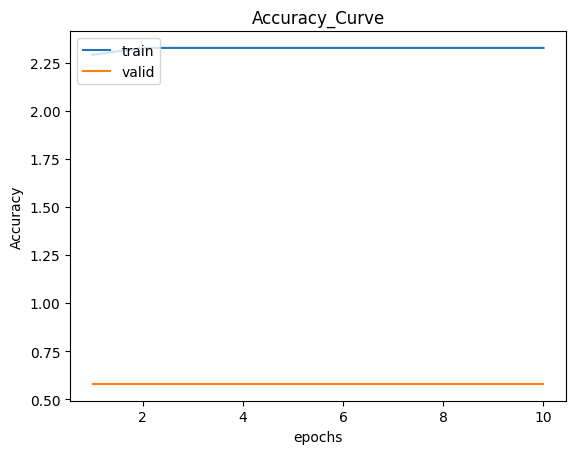

In [10]:
model = Classification(3, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = lr_scheduler.StepLR(optimizer, step_size = 7, gamma = 0.1)
softmax = nn.Softmax(dim = -1)


train_loss = []
train_accs = []
valid_loss = []
valid_accs = []
    
for epoch in range(epochs):
    tl = 0
    ta = 0
    total = 0
    model.train()
    for batch in tqdm(train_loader):
        imgs, labels = batch
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(imgs)
     
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        tl += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        ta += (preds == labels).sum().item()
    scheduler.step()
    print(f'Epoch {epoch+1} / {epochs} | train_accs = {ta / total} & train_loss = {tl / total}')

    model.eval()
    vl = 0.0
    va = 0
    total = 0
    with torch.no_grad():
        for batch in tqdm(valid_loader):
            imgs, labels = batch
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            vl += loss.item()
            _, preds= torch.max(outputs, 1)
            total += labels.size(0)
            va += (preds == labels).sum().item()

    print(f'Epoch {epoch+1} / {epochs} | validation_accs = {va / total} & validation_loss = {vl / total}')
    train_loss.append(tl / total)
    train_accs.append(ta / total)
    valid_loss.append(vl / total)
    valid_accs.append(va / total)

torch.save(model.state_dict(), './checkpoints/proj1_baseline.pth')
Plot('Loss_Curve', 'Loss', range(1, epochs+1), train_loss, valid_loss)
Plot('Accuracy_Curve', 'Accuracy', range(1, epochs+1), train_accs, valid_accs)

In [8]:
preds_list = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        imgs = batch
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds= torch.max(outputs, 1)
        preds_list += preds.tolist()

name = sorted(os.listdir("retina-test"))
for i in range(len(name)):
    name[i], _ = name[i].split('.')

submission ={"image" : name, "level" : preds_list}
file = pd.DataFrame(submission)
file.to_csv("submission1.csv", index = False)

100%|██████████| 17/17 [00:01<00:00, 10.58it/s]
